In [1]:
import ast
import matplotlib.pyplot as plt
import regex as re
from collections import defaultdict
from math import log

In [2]:
def get_trainloss(file,epoch_loss):

    with open(f"{file}", "r") as f:
        for line in f:
            line = line.strip()
            if "{" in line and "}" in line:
                try:
                    match = re.search(r"\{.*\}", line)
                    if match:
                        data_str = match.group(0)
                        data = ast.literal_eval(data_str)

                        if 'epoch' in data:
                            epoch = data['epoch']
                            if epoch not in epoch_loss:
                                epoch_loss[epoch] = {}

                            if 'loss' in data:
                                epoch_loss[epoch]['log_loss'] = log(data['loss'])

                            if 'mean_token_accuracy' in data:
                                epoch_loss[epoch]['accuracy'] = data['mean_token_accuracy']

                except Exception as e:
                    print(f"Skipping line due to error: {e}\nLine: {line}")

def get_evalloss(file,epoch_loss):
    with open(f"{file}", "r") as f:
        for line in f:
            line = line.strip()
            if "{" in line and "}" in line:
                try:
                    match = re.search(r"\{.*\}", line)
                    if match:
                        data_str = match.group(0)
                        data = ast.literal_eval(data_str)

                        #define dictionary key,value pair
                        if 'epoch' in data:
                            epoch = data['epoch']
                            if epoch not in epoch_loss:
                                epoch_loss[epoch] = {}

                            if 'eval_loss' in data:
                                epoch_loss[epoch]['log_loss'] = log(data['eval_loss'])

                            if 'eval_mean_token_accuracy' in data:
                                epoch_loss[epoch]['accuracy'] = data['eval_mean_token_accuracy']

                except Exception as e:
                    print(f"Skipping line due to error: {e}\nLine: {line}")

In [9]:
log_dir="/srv/chawak/planning-with-llms/src/logs/June/"

In [10]:
# log_files=[f"{log_dir}train-2905.log",
#            f"{log_dir}train-3005.log",
#            f"{log_dir}train-0106.log",
#            f"{log_dir}train-0506.log",
#            f"{log_dir}train-0906.log"]

In [11]:
log_files=[f"{log_dir}train-1106.log"]

In [12]:
train_loss={}
print(log_files)
for file in log_files:
    # print(f"Type: {type(file)}, Value: {file}")
    get_trainloss(file=file,epoch_loss=train_loss)

['/srv/chawak/planning-with-llms/src/logs/June/train-1106.log']


In [13]:
train_loss.items()

dict_items([(1.0, {'log_loss': 1.3672389545847314, 'accuracy': 0.17091310698382348}), (2.0, {'log_loss': 0.8510479628122178, 'accuracy': 0.26031862735674566}), (3.0, {'log_loss': 0.7859997975745616, 'accuracy': 0.28560138880846064}), (4.0, {'log_loss': 0.7406508032039122, 'accuracy': 0.30433698271110926}), (5.0, {'log_loss': 0.7081835653860585, 'accuracy': 0.3173955760142546}), (6.0, {'log_loss': 0.6841064359077962, 'accuracy': 0.32931491283883163}), (7.0, {'log_loss': 0.6656218094951933, 'accuracy': 0.33569354213745534}), (8.0, {'log_loss': 0.6483589977698113, 'accuracy': 0.3441542039239813}), (9.0, {'log_loss': 0.6316972182437227, 'accuracy': 0.3501945110903198}), (10.0, {'log_loss': 0.6172375864595951, 'accuracy': 0.35829963544695964}), (11.0, {'log_loss': 0.6022373052001027, 'accuracy': 0.36539725390933103}), (12.0, {'log_loss': 0.5875088485369484, 'accuracy': 0.3704745969937325}), (13.0, {'log_loss': 0.5700186330787945, 'accuracy': 0.3776148104627523}), (14.0, {'log_loss': 0.55336

In [14]:
for epoch, metrics in sorted(train_loss.items()):
    log_loss = metrics.get('log_loss', 'N/A')
    accuracy = metrics.get('accuracy', 'N/A')
    print(f"Epoch {epoch}: log_loss = {log_loss}, accuracy = {accuracy}")

Epoch 1.0: log_loss = 1.3672389545847314, accuracy = 0.17091310698382348
Epoch 2.0: log_loss = 0.8510479628122178, accuracy = 0.26031862735674566
Epoch 3.0: log_loss = 0.7859997975745616, accuracy = 0.28560138880846064
Epoch 4.0: log_loss = 0.7406508032039122, accuracy = 0.30433698271110926
Epoch 5.0: log_loss = 0.7081835653860585, accuracy = 0.3173955760142546
Epoch 6.0: log_loss = 0.6841064359077962, accuracy = 0.32931491283883163
Epoch 7.0: log_loss = 0.6656218094951933, accuracy = 0.33569354213745534
Epoch 8.0: log_loss = 0.6483589977698113, accuracy = 0.3441542039239813
Epoch 9.0: log_loss = 0.6316972182437227, accuracy = 0.3501945110903198
Epoch 10.0: log_loss = 0.6172375864595951, accuracy = 0.35829963544695964
Epoch 11.0: log_loss = 0.6022373052001027, accuracy = 0.36539725390933103
Epoch 12.0: log_loss = 0.5875088485369484, accuracy = 0.3704745969937325
Epoch 13.0: log_loss = 0.5700186330787945, accuracy = 0.3776148104627523
Epoch 14.0: log_loss = 0.5533677380316598, accuracy 

In [15]:
eval_loss={}
for file in log_files:
    get_evalloss(file=file,epoch_loss=eval_loss)

In [16]:
# Print and plot
for epoch, loss in sorted(eval_loss.items()):
    print(f"Epoch {epoch}: loss = {loss}")

Epoch 1.0: loss = {'log_loss': 0.9161587346375125, 'accuracy': 0.22789742230591045}
Epoch 2.0: loss = {'log_loss': 0.8586388437423701, 'accuracy': 0.2542493754668707}
Epoch 3.0: loss = {'log_loss': 0.8390955477281056, 'accuracy': 0.2668721523532367}
Epoch 4.0: loss = {'log_loss': 0.8027674475558675, 'accuracy': 0.28103345040845346}
Epoch 5.0: loss = {'log_loss': 0.807143219415984, 'accuracy': 0.27275965403930014}
Epoch 6.0: loss = {'log_loss': 0.7891863519955141, 'accuracy': 0.28452845865927906}
Epoch 7.0: loss = {'log_loss': 0.7835389773566408, 'accuracy': 0.280647646445018}
Epoch 8.0: loss = {'log_loss': 0.7813363170844139, 'accuracy': 0.2849447817418231}
Epoch 9.0: loss = {'log_loss': 0.7834932356184076, 'accuracy': 0.28322183156019476}
Epoch 10.0: loss = {'log_loss': 0.7837771273148161, 'accuracy': 0.28804026354463347}
Epoch 11.0: loss = {'log_loss': 0.8029677380792756, 'accuracy': 0.2833042383253814}
Epoch 12.0: loss = {'log_loss': 0.8023808535372761, 'accuracy': 0.278465950936378

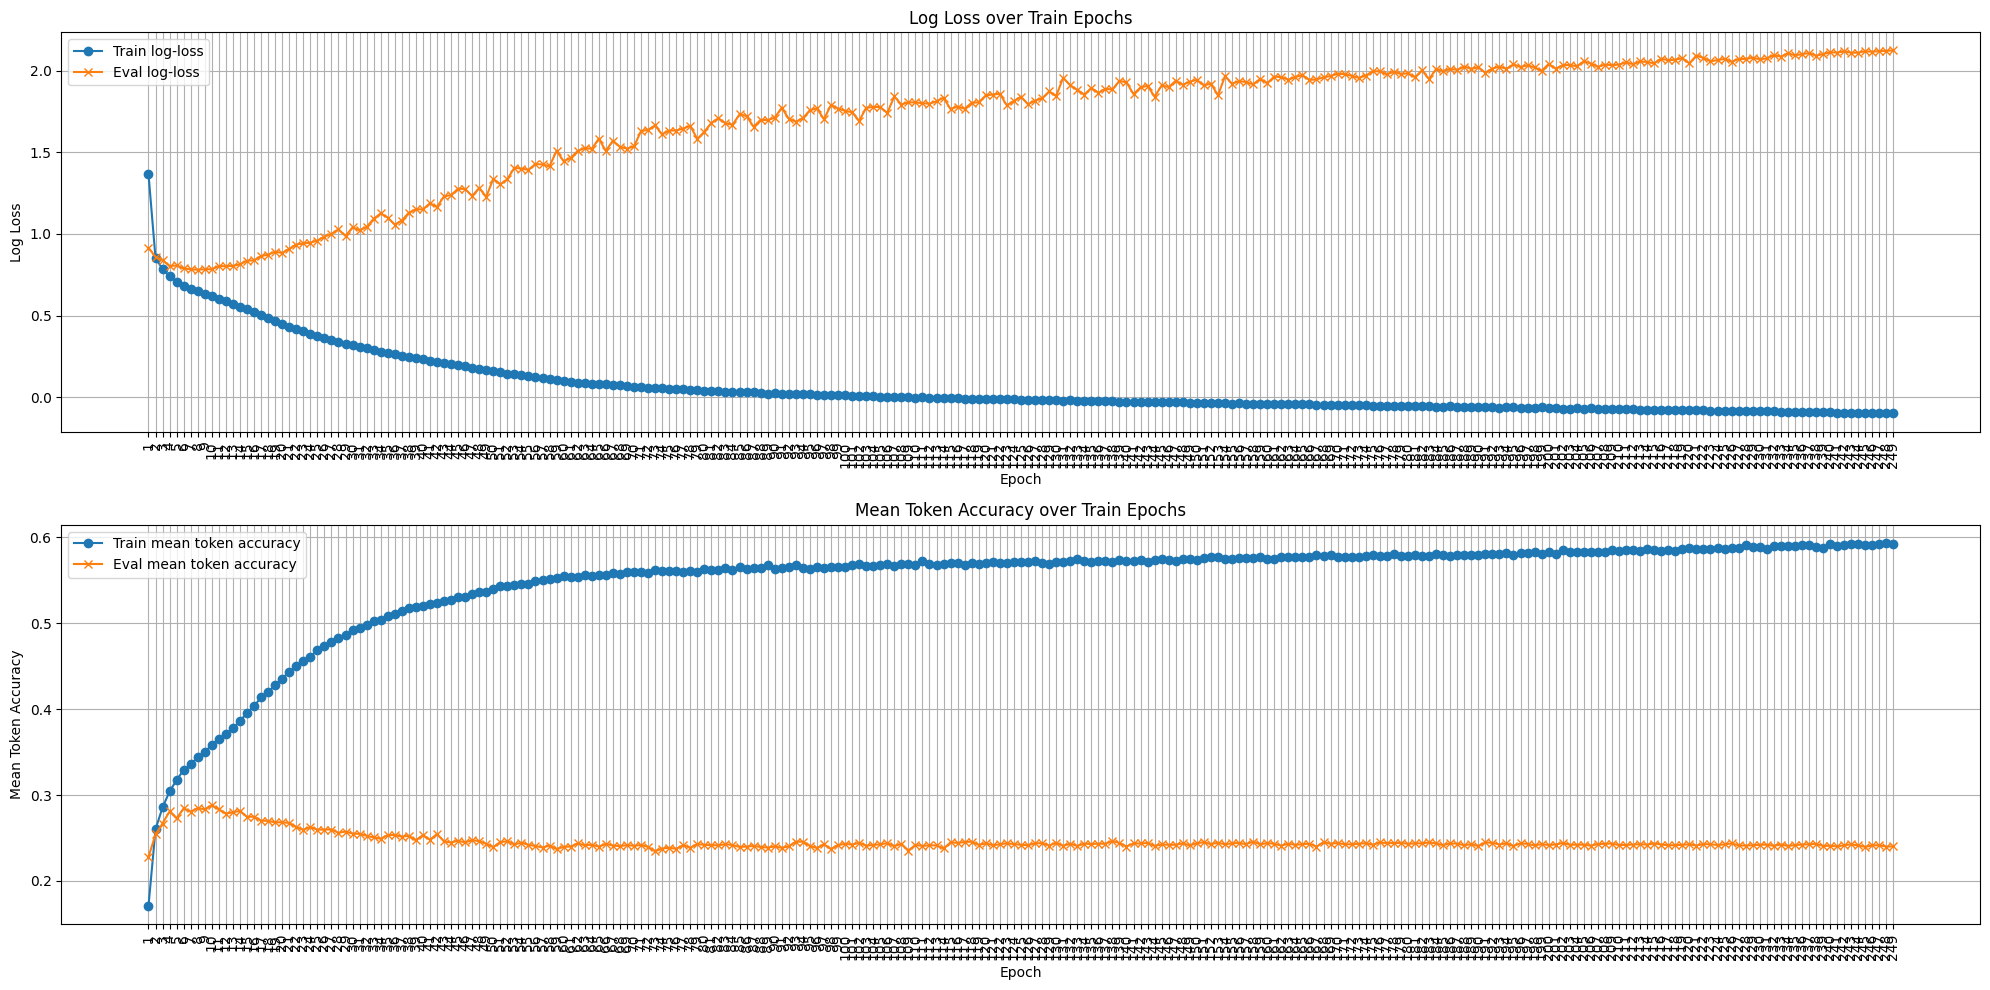

In [17]:
import matplotlib.pyplot as plt

epochs = sorted(train_loss.keys())
train_log_losses = [train_loss[epoch].get('log_loss') for epoch in epochs]
eval_log_losses= [eval_loss[epoch].get('log_loss') for epoch in epochs]

train_acc = [train_loss[epoch].get('accuracy') for epoch in epochs]
eval_acc = [eval_loss[epoch].get('accuracy') for epoch in epochs]
plt.figure(figsize=(20, 10))

# plt.subplot(1, 2, 1)
plt.subplot(2, 1, 1)
plt.plot(epochs, train_log_losses, marker='o', label='Train log-loss')
plt.plot(epochs, eval_log_losses, marker='x', label='Eval log-loss')
plt.title("Log Loss over Train Epochs")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.xticks(epochs)
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

# plt.subplot(1, 2, 2)
plt.subplot(2, 1, 2)
plt.plot(epochs, train_acc, marker='o', label='Train mean token accuracy')#, color='green')
plt.plot(epochs,eval_acc, marker='x', label='Eval mean token accuracy')
plt.title("Mean Token Accuracy over Train Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Token Accuracy")
plt.xticks(epochs)
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [18]:
train_loss.items()

dict_items([(1.0, {'log_loss': 1.3672389545847314, 'accuracy': 0.17091310698382348}), (2.0, {'log_loss': 0.8510479628122178, 'accuracy': 0.26031862735674566}), (3.0, {'log_loss': 0.7859997975745616, 'accuracy': 0.28560138880846064}), (4.0, {'log_loss': 0.7406508032039122, 'accuracy': 0.30433698271110926}), (5.0, {'log_loss': 0.7081835653860585, 'accuracy': 0.3173955760142546}), (6.0, {'log_loss': 0.6841064359077962, 'accuracy': 0.32931491283883163}), (7.0, {'log_loss': 0.6656218094951933, 'accuracy': 0.33569354213745534}), (8.0, {'log_loss': 0.6483589977698113, 'accuracy': 0.3441542039239813}), (9.0, {'log_loss': 0.6316972182437227, 'accuracy': 0.3501945110903198}), (10.0, {'log_loss': 0.6172375864595951, 'accuracy': 0.35829963544695964}), (11.0, {'log_loss': 0.6022373052001027, 'accuracy': 0.36539725390933103}), (12.0, {'log_loss': 0.5875088485369484, 'accuracy': 0.3704745969937325}), (13.0, {'log_loss': 0.5700186330787945, 'accuracy': 0.3776148104627523}), (14.0, {'log_loss': 0.55336

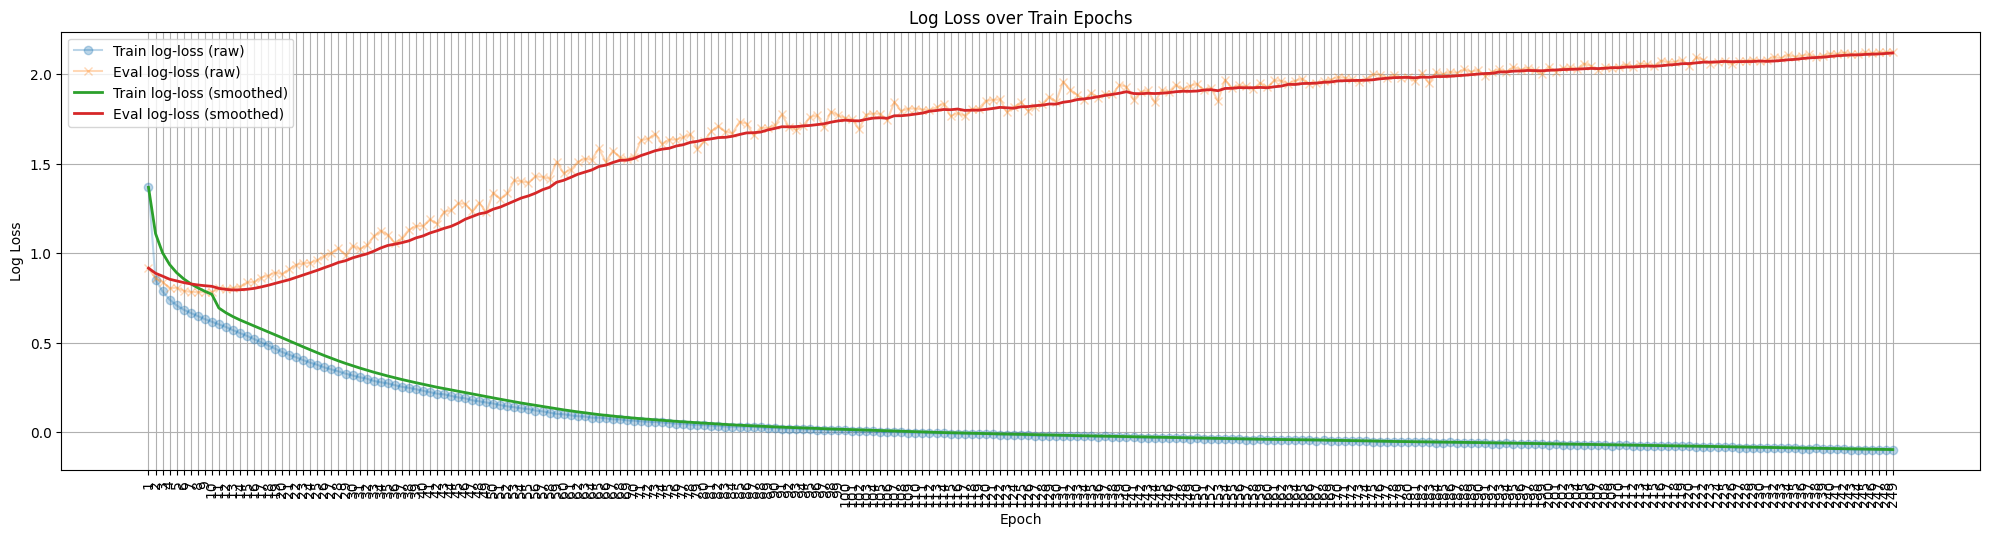

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

epochs = sorted(train_loss.keys())
train_log_losses = [train_loss[epoch].get('log_loss') for epoch in epochs]
eval_log_losses = [eval_loss[epoch].get('log_loss') for epoch in epochs]

# Compute moving averages with window size 10
train_log_smooth = pd.Series(train_log_losses).rolling(window=10, min_periods=1).mean()
eval_log_smooth = pd.Series(eval_log_losses).rolling(window=10, min_periods=1).mean()


train_acc = [train_loss[epoch].get('accuracy') for epoch in epochs]
eval_acc = [eval_loss[epoch].get('accuracy') for epoch in epochs]

# Compute moving averages with window size 10
train_acc_smooth = pd.Series(train_acc).rolling(window=10, min_periods=1).mean()
eval_acc_smooth = pd.Series(eval_acc).rolling(window=10, min_periods=1).mean()

plt.figure(figsize=(20, 10))

# Log Loss Plot
# plt.subplot(2, 1, 1)
# plt.plot(epochs, train_log_losses, marker='o', label='Train log-loss')
# plt.plot(epochs, eval_log_losses, marker='x', label='Eval log-loss')
# plt.title("Log Loss over Train Epochs")
# plt.xlabel("Epoch")
# plt.ylabel("Log Loss")
# plt.xticks(epochs, rotation=90)
# plt.legend()
# plt.grid(True)

plt.subplot(2, 1, 1)
plt.plot(epochs, train_log_losses, marker='o', alpha=0.3, label='Train log-loss (raw)')
plt.plot(epochs, eval_log_losses, marker='x', alpha=0.3, label='Eval log-loss (raw)')
plt.plot(epochs, train_log_smooth, label='Train log-loss (smoothed)', linewidth=2)
plt.plot(epochs, eval_log_smooth, label='Eval log-loss (smoothed)', linewidth=2)
plt.title("Log Loss over Train Epochs")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.xticks(epochs, rotation=90)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


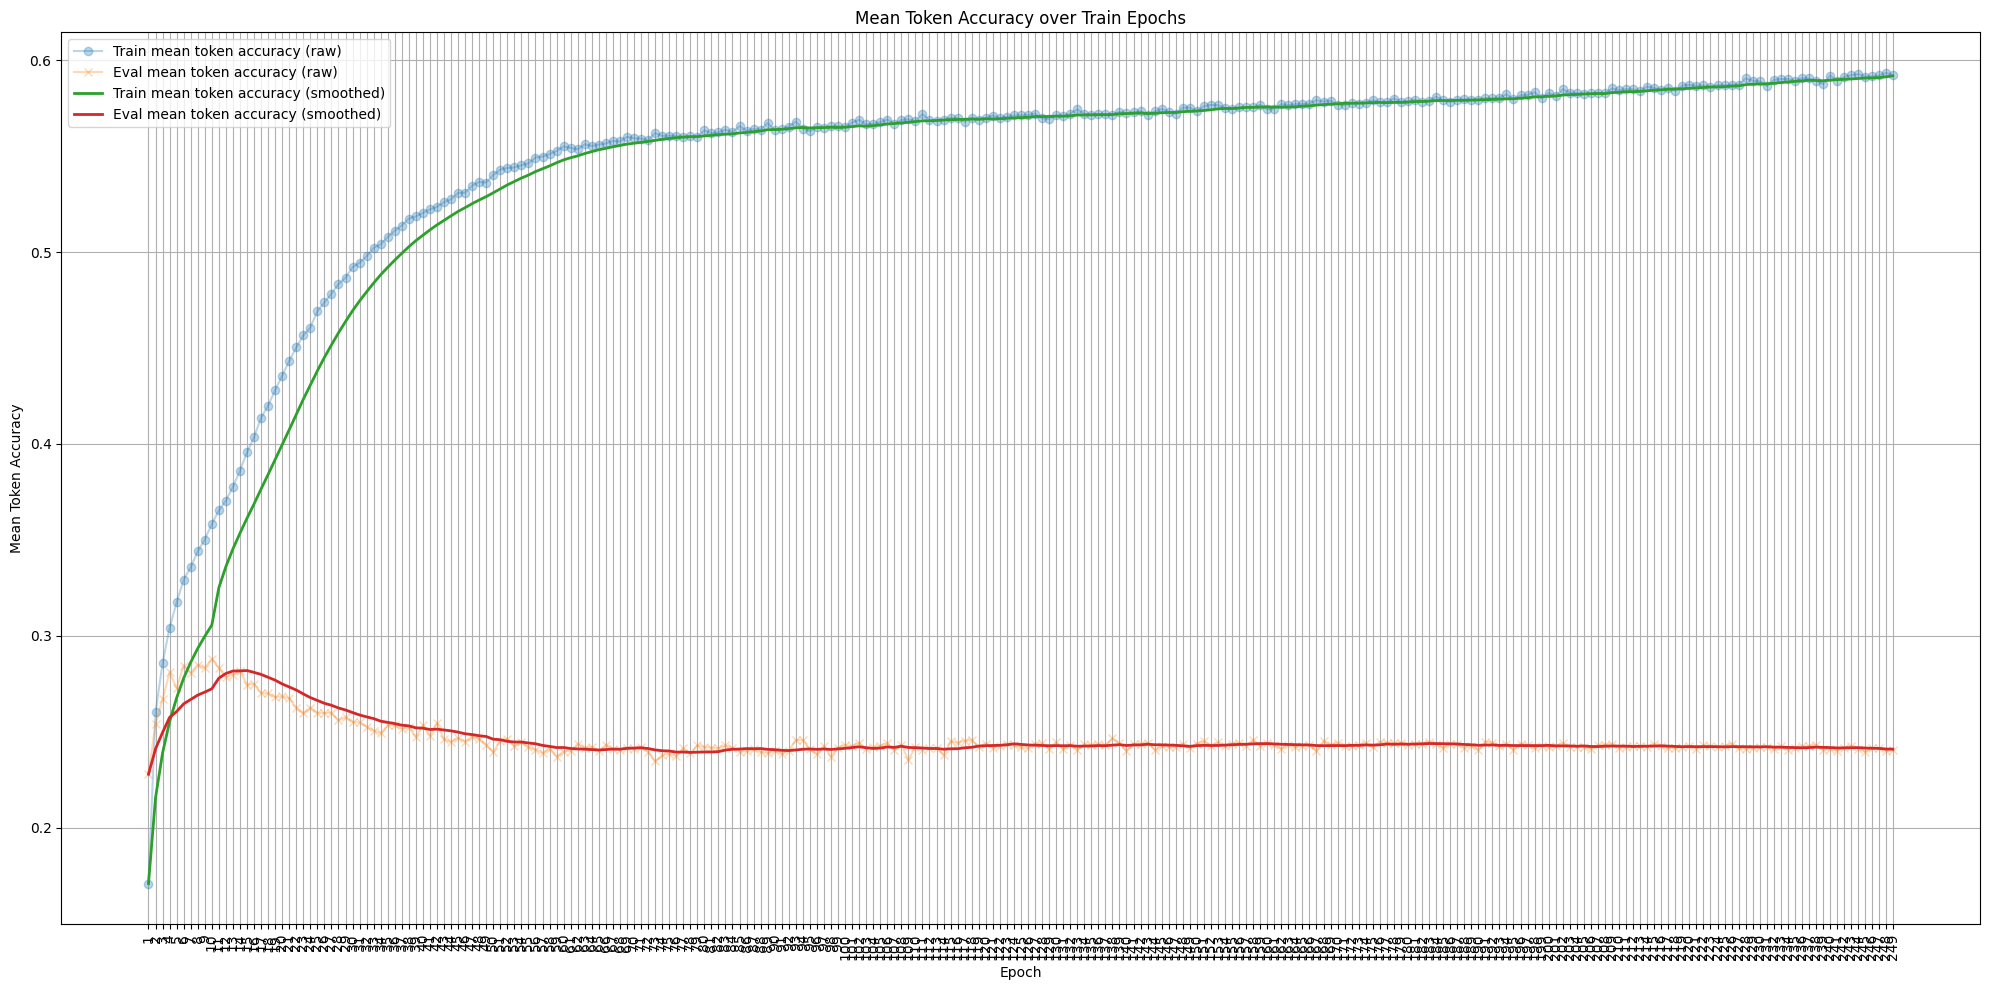

In [20]:
# Accuracy Plot with Smoothed Curves
# plt.plot(2, 1, 2)
plt.figure(figsize=(20, 10))

plt.plot(epochs, train_acc, marker='o', alpha=0.3, label='Train mean token accuracy (raw)')
plt.plot(epochs, eval_acc, marker='x', alpha=0.3, label='Eval mean token accuracy (raw)')
plt.plot(epochs, train_acc_smooth, label='Train mean token accuracy (smoothed)', linewidth=2)
plt.plot(epochs, eval_acc_smooth, label='Eval mean token accuracy (smoothed)', linewidth=2)
plt.title("Mean Token Accuracy over Train Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Token Accuracy")
plt.xticks(epochs, rotation=90)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()